**Классификация изображений с помощью сверточных нейронных сетей**

В данном задании Вам необходимо разработать архитектуру сверточной ИНС, обеспечивающую наибольшую точность при ограничении на количество операций (FLOPs <= 0.707e6).
Заготовка кода для выполнения задания приведена выше. Вашей задачей будет заполнить пропущеные места, которые отмечены ключевым словом *None*.
Необходимая точность (accuracy) сети на датасете CIFAR100 - 30%
Желаемая точность (accuracy) сети на датасете CIFAR100 - 45%

In [ ]:
!pip install keras-flops

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import tensorflow as tf
from keras_flops import get_flops

In [2]:
# Глобальные константы
CLASSES       = 100
BATCH_SIZE    = 512
LEARNING_RATE = 1e-2

In [3]:
# Выполните загрузку модели
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar100.load_data()

In [4]:
# Преобразуйте метки классов в one_hot формат

X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, CLASSES)

In [5]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# убедитесь, что данная ячейка выполняется без ошибок
assert X_train.shape == (50000, 32, 32, 3)
assert X_val.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 100)
assert y_val.shape == (10000, 100)

In [21]:
#Модель

inputs = tf.keras.Input(shape=(32,32,3))
x = tf.keras.layers.Conv2D(30, kernel_size=(4,4),strides=(4,4),padding='valid')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(16, kernel_size=(1,1),strides=(1,1),padding='valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(32, kernel_size=(1,1),strides=(1,1),padding='valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x1 = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.DepthwiseConv2D(8, strides=1)(x1)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(35, kernel_size=(1,1),padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Flatten()(x)

x2 = tf.keras.layers.DepthwiseConv2D(8, strides=2)(x1)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Activation('relu')(x2)
x2 = tf.keras.layers.Conv2D(35, kernel_size=(3,3),padding='same')(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Activation('relu')(x2)
x2 = tf.keras.layers.Flatten()(x2)

x3 = tf.keras.layers.Conv2D(6, kernel_size=(2,2),padding='same')(inputs)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Activation('relu')(x3)

x3 = tf.keras.layers.DepthwiseConv2D(32, strides=1)(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Activation('relu')(x3)
x3 = tf.keras.layers.Conv2D(35, kernel_size=(1,1),padding='same')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Activation('relu')(x3)
x3 = tf.keras.layers.Flatten()(x3)

x = tf.keras.layers.Concatenate()([x, x2, x3])
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(400, kernel_regularizer=tf.keras.regularizers.L2(0.4))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
#x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(CLASSES)(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(inputs, output)

# вывод краткой информации о модели
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_28 (Conv2D)             (None, 8, 8, 30)     1470        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_48 (BatchN  (None, 8, 8, 30)    120         ['conv2d_28[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_48 (Activation)     (None, 8, 8, 30)     0           ['batch_normalization_48[0]

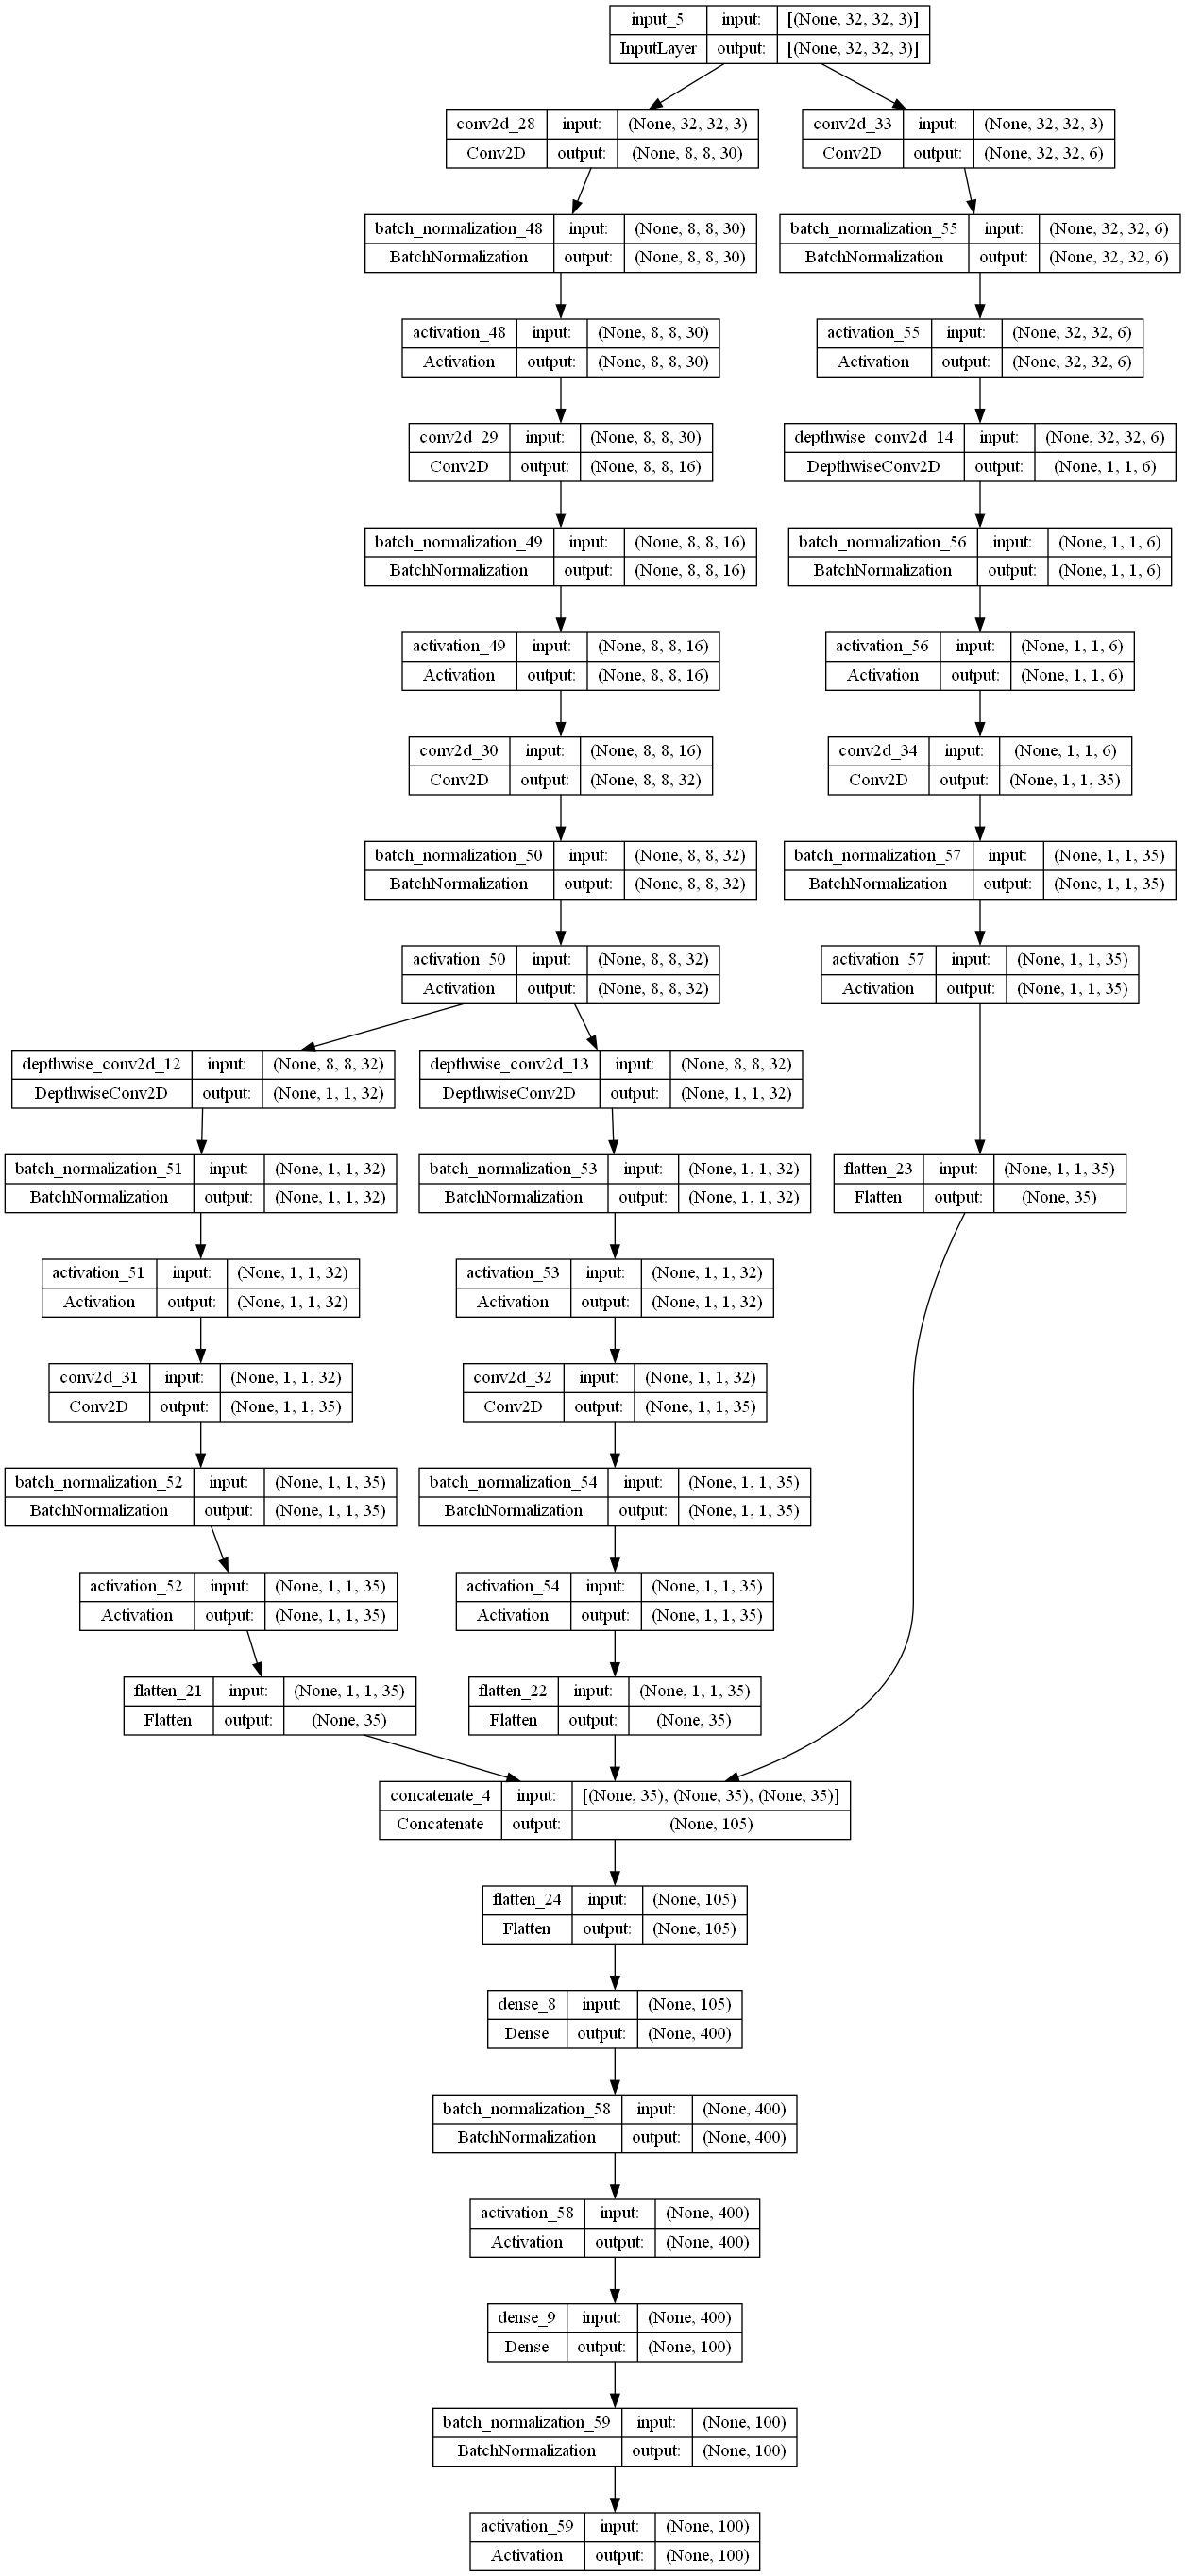

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [23]:
# вычисление количества операций
flops = get_flops(model, batch_size=1)
print(f"FLOPs: {(flops / 1e6):.4f}e6")

FLOPs: 0.7065e6


In [24]:
# параметры данной ячейки могут быть изменены для получения более высокой точности
model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=LEARNING_RATE, decay_steps=1000, decay_rate=0.2)
    ),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [25]:
# обучения модели
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=BATCH_SIZE,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(filepath="{epoch:02d}-{val_accuracy:.2f}.hdf5", save_best_only=True),
        
    ],
    use_multiprocessing=True,
    workers=8,
    epochs=1024
)

Epoch 1/1024
98/98 [==============================] - 4s 25ms/step - loss: 7.2465 - accuracy: 0.1103 - val_loss: 5.1095 - val_accuracy: 0.0190
Epoch 2/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.9537 - accuracy: 0.1803 - val_loss: 5.0014 - val_accuracy: 0.0149
Epoch 3/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.7551 - accuracy: 0.2097 - val_loss: 4.7313 - val_accuracy: 0.0598
Epoch 4/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.5691 - accuracy: 0.2343 - val_loss: 4.3354 - val_accuracy: 0.1084
Epoch 5/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.4099 - accuracy: 0.2533 - val_loss: 4.1850 - val_accuracy: 0.1206
Epoch 6/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.2784 - accuracy: 0.2720 - val_loss: 3.8604 - val_accuracy: 0.1657
Epoch 7/1024
98/98 [==============================] - 2s 21ms/step - loss: 3.1722 - accuracy: 0.2815 - val_loss: 3.4461 - val_accuracy: 0.2259

KeyboardInterrupt: 